In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [267]:
papers_df = pd.read_json('Papers_Metadata_6K.json')

papers_df.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [268]:
papers_df.index

RangeIndex(start=0, stop=6000, step=1)

In [269]:
users_df =pd.read_json("users.json")
users_df.head()


,userID,Location,Age
0,1,nyc,NULL
1,2,stockton,18
2,3,moscow,NULL
3,4,porto,17
4,5,farnborough,NULL


In [270]:
ratings_df =pd.read_json("User_Ratings.json")
ratings_df.head()

,userID,id,paperRating
0,112,1802.00209v1,6
1,21,1603.03827v1,9
2,12,1606.00776v2,6
3,92,1705.08142v2,2
4,52,1709.02349v2,7


In [271]:
print(ratings_df.shape)
print(list(ratings_df.columns))

(1999, 3)
['userID', 'id', 'paperRating']


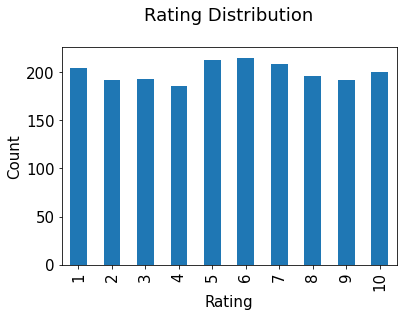

In [272]:
plt.rc("font", size=15)
ratings_df.paperRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [273]:
print(papers_df.shape)
print(list(papers_df.columns))

(6000, 9)
['author', 'day', 'id', 'link', 'month', 'summary', 'tag', 'title', 'year']


In [274]:
print(users_df.shape)
print(list(users_df.columns))

(267, 3)
['userID', 'Location', 'Age']


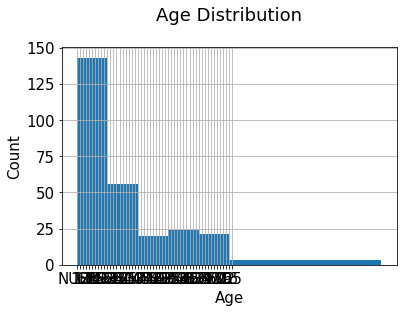

In [275]:
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [276]:
rating_count = pd.DataFrame(ratings_df.groupby('id')['paperRating'].count())
rating_count.sort_values('paperRating', ascending=False).head()

,paperRating
id,
1802.00209v1,136
1606.00776v2,135
1603.03827v1,135
1705.08142v2,25
1709.08878v1,25


In [277]:
most_rated_books = pd.DataFrame(['1802.00209v1', '1606.00776v2', '1603.03827v1', '1705.08142v2', '1709.08878v1'], index=np.arange(5), columns = ['id'])
most_rated_books_summary = pd.merge(most_rated_books, papers_df, on='id')
most_rated_books_summary

,id,author,day,link,month,summary,tag,title,year
0,1802.00209v1,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,1606.00776v2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
2,1603.03827v1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
3,1705.08142v2,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,1709.08878v1,"[{'name': 'Kelvin Guu'}, {'name': 'Tatsunori B...",26,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We propose a new generative model of sentences...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Generating Sentences by Editing Prototypes,2017


In [278]:
average_rating = pd.DataFrame(ratings_df.groupby('id')['paperRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('id')['paperRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,paperRating,ratingCount
id,,
1802.00209v1,5.367647,136
1606.00776v2,5.518519,135
1603.03827v1,5.629630,135
1705.08142v2,4.640000,25
1709.08878v1,5.600000,25


In [279]:
counts1 = ratings_df['userID'].value_counts()
ratings_df = ratings_df[ratings_df['userID'].isin(counts1[counts1 >= 1].index)]
counts = ratings_df['paperRating'].value_counts()
ratings_df = ratings_df[ratings_df['paperRating'].isin(counts[counts >= 1].index)]

In [280]:
'''ratings_df_pivot = ratings_df.pivot(index='userID', columns='id').paperRating
userID = ratings_df_pivot.index
id = ratings_df_pivot.columns
print(ratings_df_pivot.shape)
ratings_df_pivot.head()'''


ratings_df_pivot = pd.pivot_table(ratings_df, values='paperRating',
                                    index=['userID'], columns=['id'])
ratings_df_pivot.head()



id,0812.0743v2,0911.5372v1,1004.4965v1,1006.1346v2,1007.2449v1,1008.1566v5,1008.1643v2,1010.3460v2,1102.2739v1,1103.4487v1,...,1802.09914v1,1803.00094v1,1803.01686v1,1803.02544v2,1803.03232v1,1803.03692v1,1803.05407v1,1803.06959v1,1803.07679v1,1803.08240v1
userID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
bones_ratings = ratings_df_pivot['0911.5372v1']
similar_to_bones = ratings_df_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=0].sort_values('pearsonR', ascending=False).head(10)

/home/emine/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/emine/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
id,,
0911.5372v1,1.0,2


In [284]:
papers_corr_to_bones = pd.DataFrame(['0812.0743v2', '0911.5372v1', '1004.4965v1', '1006.1346v2', '1007.2449v1', '1008.1566v5', '1008.1643v2', '1010.3460v2', '1102.2739v1'], 
                                  index=np.arange(9), columns=['id'])
corr_papers = pd.merge(papers_corr_to_bones, papers_df, on='id')
corr_papers

,id,author,day,link,month,summary,tag,title,year
0,0812.0743v2,"[{'name': 'Qiang Li'}, {'name': 'Yan He'}, {'n...",3,"[{'rel': 'related', 'href': 'http://dx.doi.org...",12,Enormous successes have been made by quantum a...,"[{'term': 'cs.LG', 'scheme': 'http://arxiv.org...",A Novel Clustering Algorithm Based on Quantum ...,2008
1,0911.5372v1,"[{'name': 'Srinivas C. Turaga'}, {'name': 'Kev...",28,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",11,Images can be segmented by first using a class...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Maximin affinity learning of image segmentation,2009
2,1004.4965v1,"[{'name': 'Mikhail Zaslavskiy'}, {'name': 'Fra...",28,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",4,Graphs provide an efficient tool for object re...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Many-to-Many Graph Matching: a Continuous Rela...,2010
3,1006.1346v2,"[{'name': 'Pablo Sprechmann'}, {'name': 'Ignac...",7,"[{'rel': 'related', 'href': 'http://dx.doi.org...",6,Sparse modeling is a powerful framework for da...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",C-HiLasso: A Collaborative Hierarchical Sparse...,2010
4,1007.2449v1,[{'name': 'Kamran Karimi'}],14,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",7,Causality is a non-obvious concept that is oft...,"[{'term': 'cs.LG', 'scheme': 'http://arxiv.org...",A Brief Introduction to Temporality and Causality,2010
5,1008.1566v5,"[{'name': 'Zhemin Zhu'}, {'name': 'Djoerd Hiem...",9,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",8,The standard training method of Conditional Ra...,"[{'term': 'cs.LG', 'scheme': 'http://arxiv.org...",Separate Training for Conditional Random Field...,2010
6,1008.1643v2,[{'name': 'Ninan Sajeeth Philip'}],10,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",8,A learning algorithm based on primary school t...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",A Learning Algorithm based on High School Teac...,2010
7,1010.3460v2,"[{'name': 'Teng Zhang'}, {'name': 'Arthur Szla...",17,"[{'rel': 'related', 'href': 'http://dx.doi.org...",10,We present a simple and fast geometric method ...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",Hybrid Linear Modeling via Local Best-fit Flats,2010
8,1102.2739v1,[{'name': 'Sergey S. Tarasenko'}],14,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,This study is focused on the development of th...,"[{'term': 'cs.CV', 'scheme': 'http://arxiv.org...",A General Framework for Development of the Cor...,2011


In [285]:
combine_paper_rating = pd.merge(ratings_df, papers_df, on='id')
columns = ['author','year']
combine_paper_rating = combine_paper_rating.drop(columns, axis=1)
combine_paper_rating.head()

,userID,id,paperRating,day,link,month,summary,tag,title
0,112,1802.00209v1,6,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...
1,4,1802.00209v1,8,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...
2,19,1802.00209v1,3,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...
3,6,1802.00209v1,3,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...
4,85,1802.00209v1,2,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...


In [286]:
combine_paper_rating = combine_paper_rating.dropna(axis = 0, subset = ['title'])

paper_ratingCount = (combine_paper_rating.
     groupby(by = ['title'])['paperRating'].
     count().
     reset_index().
     rename(columns = {'paperRating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
paper_ratingCount.head()

,title,totalRatingCount
0,'Almost Sure' Chaotic Properties of Machine Le...,1
1,"10,000+ Times Accelerated Robust Subset Select...",1
2,3D-PRNN: Generating Shape Primitives with Recu...,1
3,A Behavior Analysis-Based Game Bot Detection A...,1
4,A Benchmarking Environment for Reinforcement L...,1


In [287]:
rating_with_totalRatingCount = combine_paper_rating.merge(paper_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userID,id,paperRating,day,link,month,summary,tag,title,totalRatingCount
0,112,1802.00209v1,6,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
1,4,1802.00209v1,8,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
2,19,1802.00209v1,3,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
3,6,1802.00209v1,3,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
4,85,1802.00209v1,2,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136


In [288]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(paper_ratingCount['totalRatingCount'].describe())

count   999.000
mean      2.001
std       7.695
min       1.000
25%       1.000
50%       1.000
75%       1.000
max     136.000
Name: totalRatingCount, dtype: float64


In [289]:
print(paper_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    2.000
0.910    2.000
0.920    2.000
0.930    2.000
0.940    2.000
0.950    2.400
0.960    6.000
0.970    6.000
0.980   12.000
0.990   18.000
Name: totalRatingCount, dtype: float64


In [290]:
popularity_threshold = 1
rating_popular_paper = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_paper.head()

,userID,id,paperRating,day,link,month,summary,tag,title,totalRatingCount
0,112,1802.00209v1,6,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
1,4,1802.00209v1,8,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
2,19,1802.00209v1,3,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
3,6,1802.00209v1,3,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136
4,85,1802.00209v1,2,1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,136


In [291]:
rating_popular_paper.shape

(1999, 10)

In [292]:
from scipy.sparse import csr_matrix
rating_popular_paper = rating_popular_paper.drop_duplicates(['userID', 'title'])
rating_popular_paper_pivot = rating_popular_paper.pivot(index = 'title', columns = 'userID', values = 'paperRating').fillna(0)
rating_popular_paper_matrix = csr_matrix(rating_popular_paper_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(rating_popular_paper_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [293]:
query_index = np.random.choice(rating_popular_paper_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(rating_popular_paper_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)



733


In [294]:
rating_popular_paper_pivot.index[query_index]

'Phonetic Temporal Neural Model for Language Identification'

In [295]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rating_popular_paper_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, rating_popular_paper_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Phonetic Temporal Neural Model for Language Identification:

1: Phonetic Temporal Neural Model for Language Identification, with distance of 0.0:
2: Is a Picture Worth Ten Thousand Words in a Review Dataset?, with distance of 0.0:
3: Learning Sparse Visual Representations with Leaky Capped Norm
  Regularizers, with distance of 0.0:
4: Hybrid Linear Modeling via Local Best-fit Flats, with distance of 0.0:
5: Structured Convolution Matrices for Energy-efficient Deep learning, with distance of 0.06367082243095545:
